## Importing Lib.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')



## Importing Dataset

In [12]:
reddataset = pd.read_csv("redwine.csv")
whitedataset = pd.read_csv("whitewine.csv")

def converter(column):
    if column >= 6:
        return 1
    elif column <= 4:
        return -1
    else:
        return 0
reddataset['quality'] = reddataset['quality'].apply(converter)
whitedataset['quality'] = whitedataset['quality'].apply(converter)

## Defining function for different dataset call

In [13]:
def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(reddataset)
    print('\nWhite Wine\n')
    functionToCall(whitedataset)

## Logistic Regression

In [14]:
LR = []
def log_regression(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    
    wine_set['quality_c'] = wine_set['quality']


    # split into training and testing sets
    predictors = wine_set.drop(['quality', 'density'], axis = 1)
    targets = wine_set.quality_c

   # Normalizing numerical features so that each feature has mean 0 and variance 1
    feature_scaler = StandardScaler()
    X_scaled = feature_scaler.fit_transform(predictors)


    pred_train, pred_test, tar_train, tar_test = train_test_split(X_scaled, targets, test_size=.3,random_state = 100)

    # build model on training data
    classifier = sklearn.ensemble.RandomForestClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    
    AccuracyLR = sklearn.metrics.accuracy_score(tar_test, predictions)
    LR.append(AccuracyLR)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)
    print(classification_report(tar_test, predictions))

print('----------------Logistic Regression------------------------')
call(log_regression)



----------------Logistic Regression------------------------

Red Wine

Confusion Matrix:
 [[  0   3   0   0   0   0]
 [  0  17   0   0   0   0]
 [  0   0 204   0   0   0]
 [  0   0   0 193   0   0]
 [  0   0   0   0  59   0]
 [  0   0   0   0   2   2]]
Accuracy: 0.9895833333333334
Score: 0.9895833333333334
RMSE: 0.10206207261596575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.85      1.00      0.92        17
           5       1.00      1.00      1.00       204
           6       1.00      1.00      1.00       193
           7       0.97      1.00      0.98        59
           8       1.00      0.50      0.67         4

    accuracy                           0.99       480
   macro avg       0.80      0.75      0.76       480
weighted avg       0.98      0.99      0.99       480


White Wine

Confusion Matrix:
 [[  3   4   0   0   0   0   0]
 [  0  45   0   0   0   0   0]
 [  0   0 408   0   0   0   0

## KNeighborsClassifier

In [15]:
KNN = []
def knn(wine_set):
    
    
    wine_set['quality_c'] = wine_set['quality']

    # split into training and testing sets
    predictors = wine_set.drop(['quality', 'density'], axis = 1)
    targets = wine_set.quality_c

    # Normalizing numerical features so that each feature has mean 0 and variance 1
    feature_scaler = StandardScaler()
    X_scaled = feature_scaler.fit_transform(predictors)


    pred_train, pred_test, tar_train, tar_test = train_test_split(X_scaled, targets, test_size=.3,random_state = 100)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    AccuracyKNN = sklearn.metrics.accuracy_score(tar_test, predictions)
    KNN.append(AccuracyKNN)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
call(knn)

----------------KNN------------------------

Red Wine

Confusion Matrix:
 [[  0   3   0   0   0   0]
 [  0  10   6   1   0   0]
 [  0   0 197   7   0   0]
 [  0   0   5 184   4   0]
 [  0   0   1  14  44   0]
 [  0   0   0   0   4   0]]
Accuracy: 0.90625
Score: 0.90625
RMSE: 0.32596012026013244

White Wine

Confusion Matrix:
 [[  1   3   3   0   0   0   0]
 [  0  13  32   0   0   0   0]
 [  0   6 374  28   0   0   0]
 [  0   0  21 670   4   0   0]
 [  0   0   0  24 239   2   0]
 [  0   0   0   1  23  24   0]
 [  0   0   0   0   0   2   0]]
Accuracy: 0.898639455782313
Score: 0.898639455782313
RMSE: 0.33094381626464864


## Naive Bayes(BernoulliNB)

In [16]:
NBC = []
def naive(wine_set):
   
    
    wine_set['quality_c'] = wine_set['quality']

    # split into training and testing sets
    predictors = wine_set.drop(['quality', 'density'], axis = 1)
    targets = wine_set.quality_c
    # Normalizing numerical features so that each feature has mean 0 and variance 1
    feature_scaler = StandardScaler()
    X_scaled = feature_scaler.fit_transform(predictors)


    pred_train, pred_test, tar_train, tar_test = train_test_split(X_scaled, targets, test_size=.3,random_state = 100)    

    


    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    AccuracyNB = sklearn.metrics.accuracy_score(tar_test, predictionsB)
    NBC.append(AccuracyNB)
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print("Bernoulli:" + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)
    

print('----------------Naive Bayes(BernoulliNB)------------------------')
call(naive)

----------------Naive Bayes(BernoulliNB)------------------------

Red Wine


Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   0  17   0   0   0]
 [  0   0 204   0   0   0]
 [  0   0   0 143  50   0]
 [  0   0   0  25  34   0]
 [  0   0   0   3   1   0]]
Accuracy: 0.79375
Bernoulli:0.79375
MSE: 0.49371044145328746

White Wine


Confusion Matrix:
 [[  0   0   7   0   0   0   0]
 [  0   1  44   0   0   0   0]
 [  0   1 407   0   0   0   0]
 [  0   0   0 553 142   0   0]
 [  0   0   0 148 117   0   0]
 [  0   0   0  24  24   0   0]
 [  0   0   0   1   1   0   0]]
Accuracy: 0.7333333333333333
Bernoulli:0.7333333333333333
MSE: 0.5808743116943583


## SVC

In [17]:
SV = []
def svc(wine_set):
    
    
    wine_set['quality_c'] = wine_set['quality']

    # split into training and testing sets
    predictors = wine_set.drop(['quality', 'density'], axis = 1)
    targets = wine_set.quality_c
    
    # Normalizing numerical features so that each feature has mean 0 and variance 1
    feature_scaler = StandardScaler()
    X_scaled = feature_scaler.fit_transform(predictors)


    pred_train, pred_test, tar_train, tar_test = train_test_split(X_scaled, targets, test_size=.3,random_state = 100)
    
    
    # build model on training data
    classifier = SVC()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    
    AccuracySVC= sklearn.metrics.accuracy_score(tar_test, predictions)
    SV.append(AccuracySVC)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------SVC------------------------')
call(svc)

----------------SVC------------------------

Red Wine

Confusion Matrix:
 [[  0   3   0   0   0   0]
 [  0  14   2   1   0   0]
 [  0   0 203   1   0   0]
 [  0   0   1 192   0   0]
 [  0   0   0   0  59   0]
 [  0   0   0   0   3   1]]
Accuracy: 0.9770833333333333
Score: 0.9770833333333333
RMSE: 0.1707825127659933

White Wine

Confusion Matrix:
 [[  0   4   2   1   0   0   0]
 [  0  37   8   0   0   0   0]
 [  0   0 408   0   0   0   0]
 [  0   0   0 695   0   0   0]
 [  0   0   0   1 264   0   0]
 [  0   0   0   0   3  45   0]
 [  0   0   0   0   0   2   0]]
Accuracy: 0.9857142857142858
Score: 0.9857142857142858
RMSE: 0.1543033499620919


## Accuracy on Red and White wine dataset

In [18]:
print("-----------------------------------------")
print("Äccuracy of Various Models on Red wine")
print("LR: ",LR[0])
print("KNN: ",KNN[0])
print("NBC: ",NBC[0])
print("SVC: ",SV[0])
print("-----------------------------------------")
print("Äccuracy of Various Models on White wine")
print("LR: ",LR[1])
print("KNN: ",KNN[1])
print("NBC: ",NBC[1])
print("SVC: ",SV[1])
print("-----------------------------------------")

-----------------------------------------
Äccuracy of Various Models on Red wine
LR:  0.9895833333333334
KNN:  0.90625
NBC:  0.79375
SVC:  0.9770833333333333
-----------------------------------------
Äccuracy of Various Models on White wine
LR:  0.9952380952380953
KNN:  0.898639455782313
NBC:  0.7333333333333333
SVC:  0.9857142857142858
-----------------------------------------


# Comparative Plot

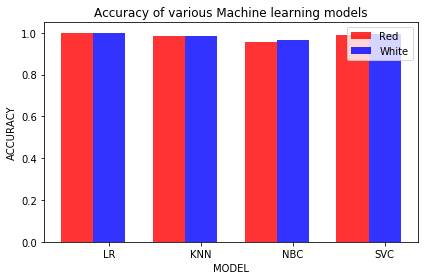

In [10]:

# data to plot
n_groups = 4
RED = (LR[0], KNN[0], NBC[0], SV[0])
WHITE = (LR[1], KNN[1], NBC[1], SV[1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, RED, bar_width,
alpha=opacity,
color='r',
label='Red')

rects2 = plt.bar(index + bar_width, WHITE, bar_width,
alpha=opacity,
color='b',
label='White')

plt.xlabel('MODEL')
plt.ylabel('ACCURACY')
plt.title('Accuracy of various Machine learning models')
plt.xticks(index + bar_width, ('LR', 'KNN', 'NBC', 'SVC'))
plt.legend()

plt.tight_layout()
plt.show()